In [1]:
from collections import defaultdict, Counter
import urllib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import (preprocessing, manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, cluster, metrics)

import scipy.cluster.hierarchy
import scipy.spatial.distance

from sklearn.metrics import pairwise_distances

import seaborn as sns
import pandas as pd

%matplotlib inline

##  Classification

Regression and classification methods are related. For intance, Logistic Regression is a classification method. However, in case of classification, predicted dependent variable is categorical, denoting a class.

In classification problems we distinguish:
* binary classification (predicting one of the two classes)
* multiclass or multivariate classification (predicting one of more than two classes)
* multilabel classification (predicting several class labels out of more than two classes)


## Clustering
In clustering we attempt to group observations in such a way that observations assigned to the same cluster are more similar to each other than to observations in other clusters. Usually, the number of categories (clusters) is also unknown.

![ML Map](http://scikit-learn.org/stable/_static/ml_map.png)

### Digits dataset is an example of a classification problem

* We can consider classification of digits as a multiclass classification or as 10 binary One-vs-All classification problems

* In case of multilabel classification each image can be assigned more than one class, e.g. for a handwritten number (12) identify labels 1 and 2.



Digits are classes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
For instance this 64 pixel image is assigned class label 3


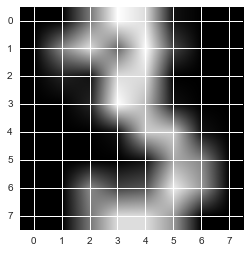

In [2]:
digits = datasets.load_digits()

# X - how digits are handwritten
X = digits['data']

# y - what these digits actually are
y = digits['target']
print("Digits are classes:", set(y))

print("For instance this 64 pixel image is assigned class label", y[3])
plt.imshow(X[3].reshape((8,8)),  cmap=plt.cm.gray)
plt.show()

An example of a classifier using Neural Network is [Google Quick Draw](https://quickdraw.withgoogle.com):

![Quickdraw](https://quickdraw.withgoogle.com/static/svg/hero.svg)


## Evalutaion of binary classifiers

### Comparing predicted class labels to actual class labels

Consider two classes 0 and 1. For a given test dataset we obtain a vector of predicted class labels and compare it to the vector of actual class labels.

For instance,

Actual:    [0, 1, 1, 0]

Predicted: [0, 0, 1, 1]

For class 0: [TP, FP, TN, FN]

For class 1: [TN, FN, TP, FP]

* TP - True Positive 
* TN - True Negative 
* FP - False Positive (Type I error)
* FN - False Negative (Type II error)
(see also Statistical Tests of Significance Type I and Type II Errors)

Although classes 0 and 1 look interchangeable, the interpretation of the results very much depends on the meaning of each class for your domain-specific problem. For instance, consider a hypotetical test where class 1 means disease and class 0 means healthy and interpret TP, TN, FP, FN.

#### Confusion matrix

Confusion matrix describes a binary classifier.

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


<table>
			<tbody><tr>
				<td colspan="2" rowspan="2"></td>
				<td colspan="2">Predicted</td>			
			</tr>
			<tr>
				<td>Negative</td>
				<td>Positive</td>
			</tr>
			<tr>
				<td rowspan="2">Actual</td>
				<td>Negative</td>
				<td><b>TN</b></td>
				<td><b>FP</b></td>
			</tr>
			<tr>
				<td>Positive</td>
				<td><b>FN</b></td>
				<td><b>TP</b></td>
			</tr>
		</tbody>
</table>

considering Class 0 = Negative and Class 1 = Positive  in our trivial case it will become:

<table>
			<tbody><tr>
				<td colspan="2" rowspan="2"></td>
				<td colspan="2">Predicted</td>			
			</tr>
			<tr>
				<td>Class 0</td>
				<td>Class 1</td>
			</tr>
			<tr>
				<td rowspan="2">Actual</td>
				<td>Class 0</td>
				<td><b>1</b></td>
				<td><b>1</b></td>
			</tr>
			<tr>
				<td>Class 1</td>
				<td><b>1</b></td>
				<td><b>1</b></td>
			</tr>
		</tbody>
</table>

From confusion matrix we can calculate a number of useful metrics:

* [Model evaluation in Scikit Learn](http://scikit-learn.org/stable/modules/model_evaluation.html)

* [Classification metrics in Scikit Learn](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

* [Imbalanced classification package](http://contrib.scikit-learn.org/imbalanced-learn/auto_examples/evaluation/plot_classification_report.html#sphx-glr-auto-examples-evaluation-plot-classification-report-py)

#### Accuracy
$$Accuracy = \frac{TP+TN}{TP+FP+FN+TN}$$
How often is the classifier correct?

* [Accuracy score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

* Accuracy for binary classifiers is [Jaccard Similarity(http://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_similarity_score.html#sklearn.metrics.jaccard_similarity_score)


#### Error rate (Misclassification rate)
$$ Error = 1 - Accuracy = \frac{FP+FN}{TP+FP+FN+TN} $$
How often is the classifier wrong?

#### True positive rate, also Sensitivity or Recall
Out of all actual positive cases, how many do we predict as positive?
$$ Sensitivity = \frac{TP}{TP + FN} $$

#### False positive rate
Out of all actual negative cases, how many are predicted as positive?
$$ FPR = \frac{FP}{TN + FP} $$

#### Specificity 
Out of all actual negative cases, how many are predicted as negative?
$$ FPR = 1-FRP = \frac{TN}{TN + FP} $$

#### Precision (Positive predictive value)
Out of all predicted positive, how many are actually positive?
$$Precision = \frac{TP}{TP + FP}$$

#### Prevalence
Fraction of actually positive cases in the dataset? Shows if there is any imbalance between positive and negative cases.
$$Prevalence = \frac{TP + FN}{TP+FP+FN+TN}$$

#### Positive Predictive Value

Positive Predictive Value [PPV](https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values) is similar to precision but takes into account imbalance of the dataset:

$$PPV = \frac{Sensitivity * Prevalence}{Sensitivity * Prevalence + (1 - Specificity) * (1 - Prevalence)}$$

#### False Discovery Rate

Sometimes False Discovery Rate -- a complement of Positive Predictive Value is reported:
$$ FDR = 1 - PPV $$


#### Prediction baseline

**Null Error Rate** is a baseline metric that shows how often a classifier would be wrong if it always predicted the class with highest prevalence (be it Positive or Negative).

For instance, if positive class is prevalent:

$$ Null = \frac{FP}{FP + TP} $$

Or in case of majority of negative cases:

$$ Null = \frac{FN}{FN + TN} $$


**Cohen's kappa** statistic calculates agreement between annotators [see more](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html)
In principle it can be used to compare observed accuracy (of a given classifier) to expected accuracy (random chance classifier). [see example with explanations](http://epiville.ccnmtl.columbia.edu/popup/how_to_calculate_kappa.html)


#### F score ($F_1$ score, F-measure)

F score is a combination of precision and recall:

$$F_1 = \frac{2TP}{2TP + FP + FN}$$


#### Precision-Recall curve

ROC Curve: This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class. (More details about ROC Curves.)




#### Receiver operating characteristic curve (ROC curve)

ROC curve illustrates the performance of a binary classifier system as its *discrimination threshold* is varied by plotting True Positive rate vs False Positive rate. It can also be referred to as a Sensitivity vs (1-Specificity) plot.

In order to make the plot you need to obtain a list of scores for each classified data point. They can be typically obtained with **.predict_proba()** or in some cases with **.decision_function()**.

* https://en.wikipedia.org/wiki/Receiver_operating_characteristic
* http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

Area under ROC curve [AUC](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) is a quantitative characteristic of a binary classifier.

In a cross-validataion setting mean and variance of ROC AUC are useful measures of classifier robustness [example](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py)

#### Precision-Recall curve

In some cases Precision and Recall plots are used for characterizing classifier performance as its *discrimination threshold* is varied.

* http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

As in the case of ROC, are under Precision-Recall curve can be calculated.

(1797,)
(1797, 10)


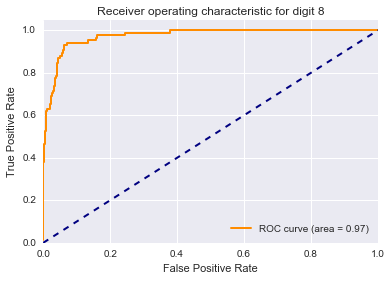

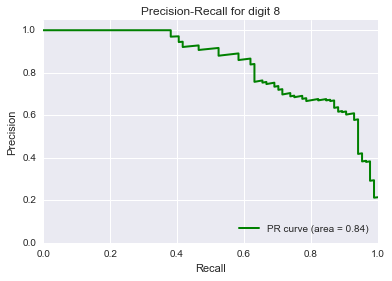

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Binarize the output
y_bin = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = y_bin.shape[1]
# now we have one binary column for each class instead of one column with many class names
print(y.shape)
print(y_bin.shape)

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=.5)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

precision = {}
recall = {}
pr_auc = {}

# we calculate 10 curves, one for each class
for i in range(n_classes):
    # ROC:
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Precision-recall:
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    pr_auc[i] = average_precision_score(y_test[:, i], y_score[:, i])

# Plot only one ROC curve for selected class
plt.figure()
lw = 2
digit = 8
plt.plot(fpr[digit], tpr[digit], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[digit])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for digit ' + str(digit))
plt.legend(loc="lower right")
plt.show()

# Plot only one Precision-Recall curve for selected class
plt.figure()
lw = 2
digit = 8
plt.plot(recall[digit], precision[digit], color='green',
         lw=lw, label='PR curve (area = %0.2f)' % pr_auc[digit])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall for digit ' + str(digit))
plt.legend(loc="lower right")
plt.show()

In [4]:
# Classification Report

from sklearn.metrics import classification_report

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)
print(y_test[0:10])
print(y_predicted[0:10])
print(classification_report(y_test, y_predicted))


[0 9 8 2 0 3 7 9 4 2]
[0 9 8 2 0 3 7 9 4 2]
             precision    recall  f1-score   support

          0       0.98      0.99      0.98        87
          1       0.84      0.96      0.90        80
          2       0.99      0.92      0.95        83
          3       0.89      0.93      0.91        87
          4       0.97      0.91      0.94        92
          5       0.94      0.95      0.95        85
          6       0.96      0.97      0.96        98
          7       0.97      0.93      0.95        99
          8       0.86      0.82      0.84        95
          9       0.90      0.90      0.90        93

avg / total       0.93      0.93      0.93       899



# Unsupervised classification methods


## Clustering

In clustering we attempt to group observations in such a way that observations assigned to the same cluster are more similar to each other than to observations in other clusters.

Although labels may be known, clustering is usually performed on unlabeled data as a step in exploratory data analysis.

The best method to use will vary developing on the particular problem.

## Evaluation of clustering

* How to measure success of clustering without true class labels?
* How to find the optimal number of clusters?
* Which clustering method to choose with what parameters?


### Model evaluation

Several approaches have been developed for evaluating clustering models but are generally limited in requiring the true clusters to be known. In the general use case for clustering this is not known with the goal being exploratory. 

Ultimately, a model is just a tool to better understand the structure of our data. If we are able to gain insight from using a clustering algorithm then it has served its purpose.

[The metrics](http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) available are Adjusted Rand Index, Mutual Information based scores, Homogeneity, completeness, v-measure, and silhouette coefficient. Of these, only the silhouette coefficient does not require the true clusters to be known.

Although the silhouette coefficient can be useful it takes a very similar approach to k-means, favoring convex clusters over more complex, equally valid, clusters.

### How to determine number of clusters

One important use for the model evaluation algorithms is in choosing the number of clusters. The clustering algorithms take as parameters either the number of clusters to partition a dataset into or other scaling factors that ultimately determine the number of clusters. It is left to the user to determine the correct value for these parameters.

As the number of clusters increases the fit to the data will always improve until each point is in a cluster by itself. As such, classical optimization algorithms searching for a minimum or maximum score will not work. Often, the goal is to find an inflection point.

If the cluster parameter is too low adding an additional cluster will have a large impact on the evaluation score. The gradient will be high at numbers of clusters less than the true value. If the cluster parameter is too high adding an additional cluster will have a small impact on the evaluation score. The gradient will be low at numbers of clusters higher than the true value.

At the correct number of clusters the gradient should suddenly change, this is an inflection point.

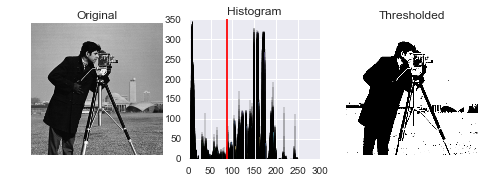

In [5]:
# An intuitive 1-D classification example
# The task is to classify pixels in an image as object and background classes
# We calculate a histogram of pixel intensities as a 1-D parameter
# and introduce a threshold separating object from background

import matplotlib
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import threshold_otsu

matplotlib.rcParams['font.size'] = 9

image = camera()
thresh = threshold_otsu(image)
binary = image > thresh

#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2.5))
fig = plt.figure(figsize=(8, 2.5))
ax1 = plt.subplot(1, 3, 1, adjustable='box-forced')
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1, adjustable='box-forced')

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')

ax2.hist(image)
ax2.set_title('Histogram')
ax2.axvline(thresh, color='r')

ax3.imshow(binary, cmap=plt.cm.gray)
ax3.set_title('Thresholded')
ax3.axis('off')

plt.show()

### Different clustering algorithms

![Cluster comparison](files/plot_cluster_comparison_001.png)
[Cluster comparison](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)


The following algorithms are provided by [scikit-learn](http://scikit-learn.org/stable/modules/clustering.html)

* K-means
* Affinity propagation
* Mean Shift
* Spectral clustering
* Ward
* Agglomerative Clustering
* DBSCAN
* Birch


**K-means** clustering divides samples between clusters by attempting to minimize the within-cluster sum of squares. It is an iterative algorithm repeatedly updating the position of the centroids (cluster centers), re-assigning samples to the best cluster and repeating until an optimal solution is reached. The clusters will depend on the starting position of the centroids so k-means is often run multiple times with random initialization and then the best solution chosen.

[Affinity Propagation](http://science.sciencemag.org/content/315/5814/972) operates by passing messages between the samples updating a record of the exemplar samples. These are samples that best represent other samples. The algorithm functions on an affinity matrix that can be eaither user supplied or computed by the algorothm. Two matrices are maintained. One matrix records how well each sample represents other samples in the dataset. When the algorithm finishes the highest scoring samples are chosen to represent the clusters. The second matrix records which other samples best represent each sample so that the entire dataset can be assigned to a cluster when the algorithm terminates.

[Mean Shift](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.76.8968&rep=rep1&type=pdf) iteratively updates candidate centroids to represent the clusters. The algorithm attempts to find areas of higher density.

**Spectral clustering** operates on an affinity matrix that can be user supplied or computed by the model. The algorithm functions by minimizing the value of the links cut in a graph created from the affinity matrix. By focusing on the relationships between samples this algorithm performs well for non-convex clusters.

**Agglomerative clustering** starts all the samples in their own cluster and then progressively joins clusters together minimizing some performance measure. In addition to minimizing the variance as seen with Ward other options are, 1) minimizing the average distance between samples in each cluster, and 2) minimizing the maximum distance between observations in each cluster.

**Ward** is a type of agglomerative clustering using minimization of the within-cluster sum of squares to join clusters together until the specified number of clusters remain.

**DBSCAN** is another algorithm that attempts to find regions of high density and then expands the clusters from there.

[Birch](http://scikit-learn.org/stable/modules/clustering.html#birch) is a tree based clustering algorithm assigning samples to nodes on a tree

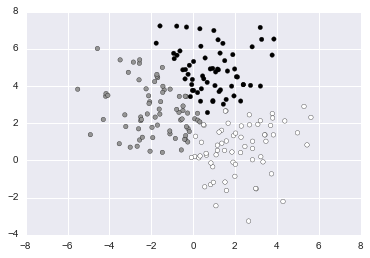

In [6]:
from sklearn import cluster, datasets

dataset, true_labels = datasets.make_blobs(n_samples=200, n_features=2, random_state=0,
                                           centers=3, cluster_std=1.5)

# fig, ax = plt.subplots(1,1)
# ax.scatter(dataset[:,0], dataset[:,1], c=true_labels)
# plt.show()

# Clustering algorithm can be used as a class
means = cluster.KMeans(n_clusters=3)
prediction = means.fit_predict(dataset)
# print(prediction)

fig, ax = plt.subplots(1,1)
ax.scatter(dataset[:,0], dataset[:,1], c=prediction)
plt.show()

### Distances and similarities between data points

[[1 5]
 [2 4]]
Euclidean
 [[ 0.          1.41421356]
 [ 1.41421356  0.        ]]

Manhattan
 [[ 0.  2.]
 [ 2.  0.]]
[[ 6.  0.  1.]
 [ 2.  1.  3.]]

Euclidean
 [[ 0.          4.58257569]
 [ 4.58257569  0.        ]]

Cosine
 [[ 0.          0.21663202]
 [ 0.21663202  0.        ]]
Manhattan
 [[ 0.  7.]
 [ 7.  0.]]
Correlation is invariant
 [[ 0.          0.84445725]
 [ 0.84445725  0.        ]]


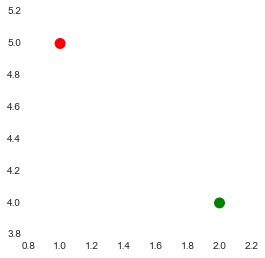

In [7]:
X = np.array([[1, 5], 
              [2, 4]])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
ax.scatter(X[...,0], X[...,1], c=("red", "green"), s=120, edgecolors='none')
ax.set_autoscale_on(False)
ax.axis('square')

print(X)
D = pairwise_distances(X, metric = 'euclidean')
print("Euclidean\n", D)
print()


D = pairwise_distances(X, metric = 'manhattan')
print("Manhattan\n", D)


X = np.array([[6, 0.0, 1.0], 
              [2, 1, 3.0]])

print(X)
print()

D = pairwise_distances(X, metric = 'euclidean')
print("Euclidean\n", D)
print()

D = pairwise_distances(X + 1, metric = 'cosine')
print("Cosine\n", D)

D = pairwise_distances(X, metric = 'manhattan')
print("Manhattan\n", D)

D = pairwise_distances(X + 20, metric = 'correlation')
print("Correlation is invariant\n", D)

Minkowsky distance:  $\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p}$

for Euclidean: p=2

for Manhattan: p=1

In [8]:
## Binary data
binary = np.array([[0, 0, 1, 1, 1, 0, 0], 
                   [0, 1, 1, 1, 0, 0, 0]], dtype=np.bool)

print(binary)

D = pairwise_distances(binary, metric = 'jaccard')
print("\nJaccard\n", D)

D = pairwise_distances(binary, metric = 'hamming')
print("\nHamming\n", D)

[[False False  True  True  True False False]
 [False  True  True  True False False False]]

Jaccard
 [[ 0.   0.5]
 [ 0.5  0. ]]

Hamming
 [[ 0.          0.28571429]
 [ 0.28571429  0.        ]]


### Pairwise distance matrix

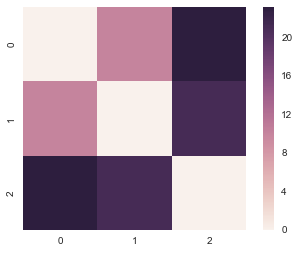

In [9]:
X = np.array([[0, 0, 0, 0], [5, 5, 5, 5], [5, 4, -10, 20]])

# Pairwise distances
D = pairwise_distances(X, metric = 'euclidean')

sns.heatmap(D, square=True)
plt.show()

## Clustering in a synthetic dataset (4D)

Visualizing data points in the matrix as a heatmap


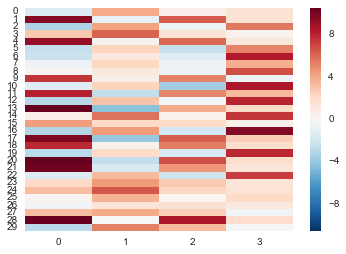

Visualizing pairwise distances between the data points


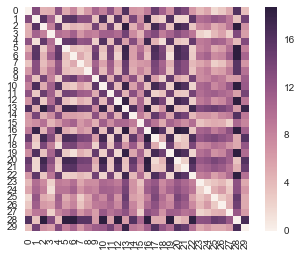

Distribution of pairwise distances


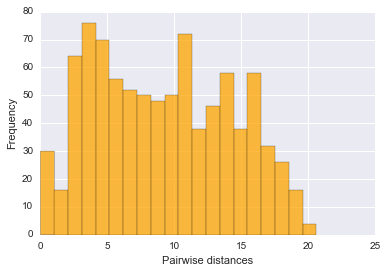

In [10]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=30, centers=3, n_features=4, random_state=0, cluster_std=1.5)
# print(X)

print("Visualizing data points in the matrix as a heatmap")
sns.heatmap(X, robust=True, square=False, yticklabels=True, xticklabels=True, cbar=True)
plt.show()

print("Visualizing pairwise distances between the data points")
D = pairwise_distances(X, metric='euclidean', n_jobs=-1)

sns.heatmap(D, robust=True, square=True, yticklabels=True, xticklabels=True, cbar=True)
plt.show()

print("Distribution of pairwise distances")
plt.hist(np.hstack(D), 20, facecolor='orange', alpha=0.75)
plt.xlabel('Pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

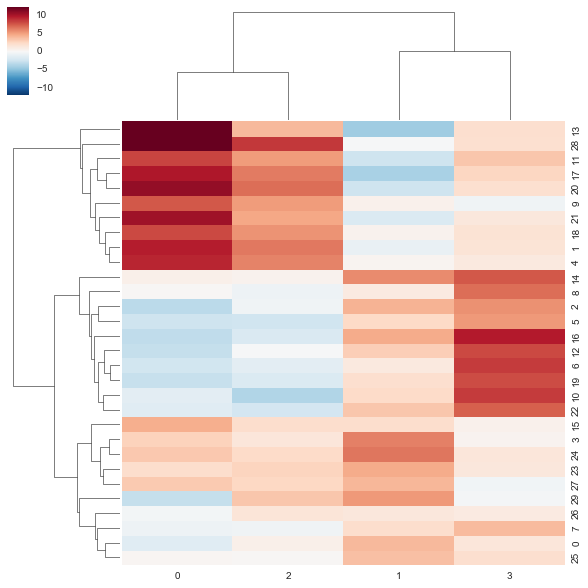

In [11]:
# Clustering is often used as an accessory
# Quick hierarchical clustering for reordering of data points according to distances between them
sns.clustermap(X)  # requires fastcluster package:  !pip install fastcluster
plt.show()

In [12]:
from sklearn.metrics.cluster import v_measure_score, adjusted_rand_score

# Clustering our 4D dataset with KMeans k=3
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(X)

print("In case we know a reference assignment of data points into clusters (labeled dataset), we can compare how well our clustering matches it")
print(y)
print(kmeans.labels_)
print("V measure", v_measure_score(y, kmeans.labels_))
print("Adj. Rand score", adjusted_rand_score(y, kmeans.labels_))


In case we know a reference assignment of data points into clusters (labeled dataset), we can compare how well our clustering matches it
[0 2 1 0 2 1 1 0 1 2 1 2 1 2 1 0 1 2 2 1 2 2 1 0 0 0 0 0 2 0]
[2 1 0 2 1 0 0 0 0 1 0 1 0 1 0 2 0 1 1 0 1 1 0 2 2 2 2 2 1 2]
V measure 0.89969354516
Adj. Rand score 0.898170393643


{2: 0.57451514350921484,
 3: 0.54407252801604578,
 4: 0.4771791410211188,
 5: 0.36371181270570208,
 6: 0.34539001625255011,
 7: 0.31170766781355586,
 8: 0.3233583442439788,
 9: 0.27526414211323064,
 10: 0.22924378868367731}


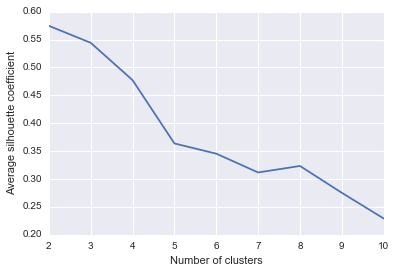

In [13]:
# Silhouette is used for assessing the performance of an unlabeled dataset

from sklearn.metrics.cluster import silhouette_score
import pprint

def calc_silhouette(data, n):
    """Runs Kmeans clustering and returns average silhouette coefficient"""    
    kmeans = cluster.KMeans(n_clusters=n).fit(data)
    score = silhouette_score(data, kmeans.labels_, metric='l2')
    return score

scores = {n: calc_silhouette(X, n) for n in range(2, 11)}
pprint.pprint(scores)
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette coefficient')
plt.show()

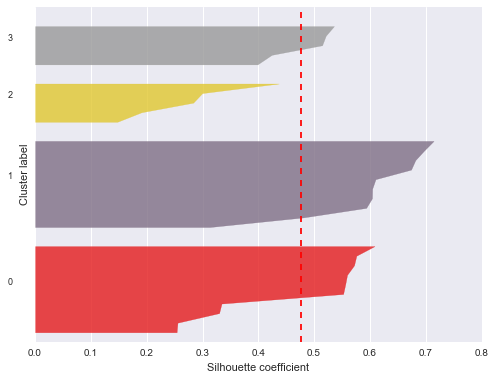

In [14]:
# Showing silhouette coefficient for each sample in each
# cluster is a powerful diagnostic tool

from sklearn.metrics.cluster import silhouette_samples

n_clusters = 4

# Compute the silhouette scores for each sample
kmeans = cluster.KMeans(n_clusters=n_clusters).fit(X)
lbls = kmeans.labels_
values = silhouette_samples(X, lbls)

g, ax = plt.subplots(figsize=(8, 6))
color_scale = np.linspace(0, 1, n_clusters)
y_lower = 1
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i
    v = sorted(values[lbls == i])
    cluster_size = len(v)
    y_upper = y_lower + cluster_size

    # color mapping:
    c = plt.cm.Set1(color_scale[i])
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, v, facecolor=c, edgecolor=c, alpha=0.8)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 1

ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Cluster label")

# Red dashed line shows an average silhouette score across all samples in all clusters
score = silhouette_score(X, lbls, metric='l2')
ax.axvline(x=score, color="red", linestyle="--")
ax.set_yticks([])
plt.show()

### Example: Protein expression in Breast Cancer (BRCA)

In [15]:
from pathlib import Path

ICGC_API = 'https://dcc.icgc.org/api/v1/download?fn=/release_18/Projects/BRCA-US/'

expression_fname = 'protein_expression.BRCA-US.tsv.gz'
if not Path(expression_fname).is_file():
    urllib.request.urlretrieve(ICGC_API + 'protein_expression.BRCA-US.tsv.gz', expression_fname);

In [16]:
E = pd.read_csv(expression_fname, delimiter='\t')
E.head(1)

,icgc_donor_id,project_code,icgc_specimen_id,icgc_sample_id,submitted_sample_id,analysis_id,antibody_id,gene_name,gene_stable_id,gene_build_version,normalized_expression_level,verification_status,verification_platform,platform,experimental_protocol,raw_data_repository,raw_data_accession
0,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,PAI-1,SERPINE1,NaN,NaN,1.769954,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20


In [17]:
donors = set(E['icgc_donor_id'])
genes = set(E['gene_name'])
print(len(donors))
print(len(genes))

298
115


In [18]:
donor2id = {donor: i for i, donor in enumerate(donors)}
id2donor = dict(zip(donor2id.values(), donor2id.keys()))

gene2id = {gene: i for i, gene in enumerate(genes)}
id2gene = dict(zip(gene2id.values(), gene2id.keys()))

# Let us create a donor x gene matrix for expression values
data = np.zeros((len(donors), len(genes)))
for i in range(len(E)):
    data[donor2id[E.loc[i, 'icgc_donor_id']], gene2id[E.loc[i, 'gene_name']]] = float(E.loc[i, 'normalized_expression_level'])

In [19]:
# data = preprocessing.Normalizer().fit_transform(data)

# Scale data, let us make all values positive from 0 to 1
data = preprocessing.MinMaxScaler().fit_transform(data)

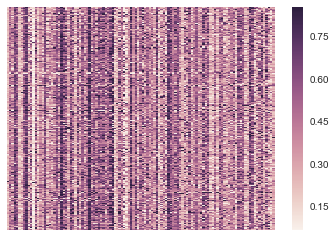

In [20]:
# print(data)
# Visualizing donors (rows) vs genes (columns) matrix
sns.heatmap(data, robust=True, square=False, yticklabels=False, xticklabels=False, cbar=True)
plt.show()

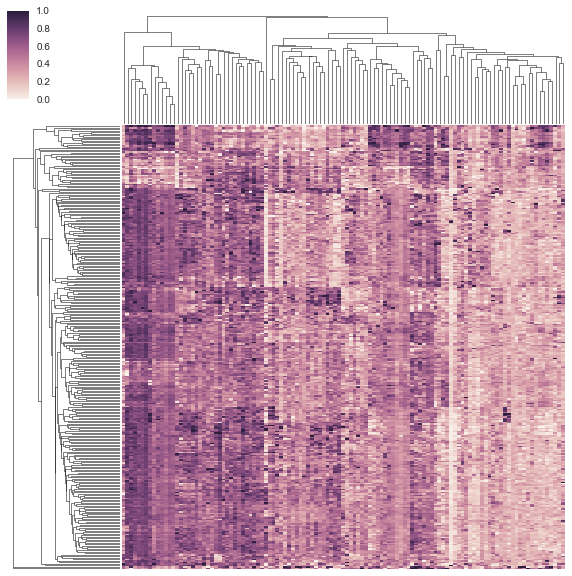

In [21]:
# Clustering of donors (rows) vs genes (columns) matrix
sns.clustermap(data, xticklabels=False, yticklabels=False)
plt.show()

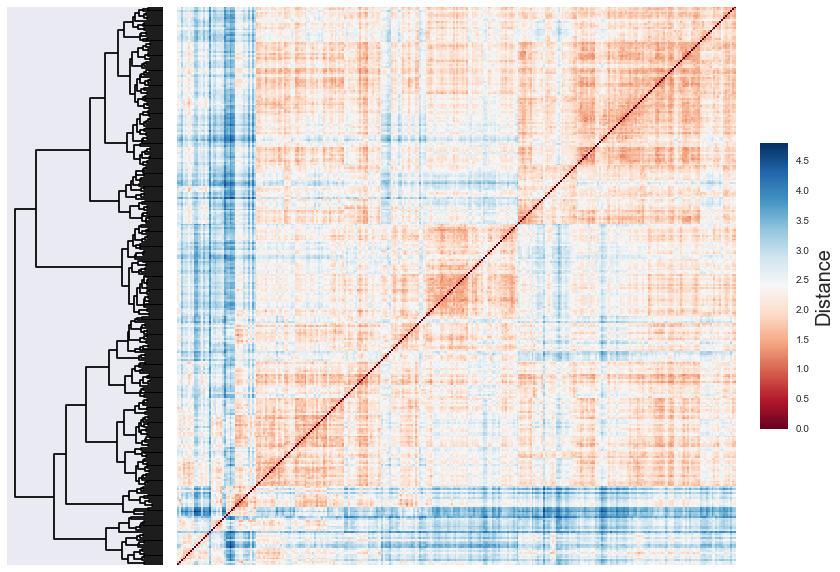

In [22]:
# Now let's make a pairwise similarity matrix and visualize it as a heatmap

def clean_axis(ax):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)

# Figure is a grid with two parts  1 : 4
fig = plt.figure(figsize=(14, 10))
grid = gridspec.GridSpec(1, 2, wspace=.01, hspace=0., width_ratios=[0.25, 1])

Y = scipy.cluster.hierarchy.linkage(data, method='ward', metric='euclidean')
# also look up:
# method = [ average (UPGMA), complete, single, ward ]
# and metric

# Dendrogram
ax = fig.add_subplot(grid[0,0])
denD = scipy.cluster.hierarchy.dendrogram(Y, orientation='left', link_color_func=lambda k: 'black')
clean_axis(ax)

# Heatmap
ax = fig.add_subplot(grid[0,1])
D = pairwise_distances(data, metric = 'euclidean')
D = D[denD['leaves'], :][:, denD['leaves']]
axi = ax.imshow(D, interpolation='nearest', aspect='equal', origin='lower', cmap='RdBu') 
clean_axis(ax)

# Legend for heatmap
cb = fig.colorbar(axi, fraction=0.046, pad=0.04, aspect=10) 
cb.set_label('Distance', fontsize=20)


## Exercises

These are exploratory exercises. Submissions will not be scored.

 * In breast cancer example change clustering methods from Kmeans to DBSCAN and AgglomerativeClustering
 * In breast cancer example experiment with different combinations of linkage and metric in AgglomerativeClustering
 